In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import statistics as stat

1.Построить гистограмму распределения соответствующей величины. Соответствует ли это теореме Севастьянова? Чтобы сопоставить модель теореме Севастьянова – рассмотрите индикаторы того, что в данном месте заканичивается некий удовлетворяющий условию блок.
Симулировать многократно: серии из c2n бросков симметричной монеты и подсчитать число блоков из орлов длины не менее чем n бросков в каждой из серий, c = 2, n = 14

(array([620.,   0., 293.,   0.,   0.,  77.,   0.,   8.,   0.,   2.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

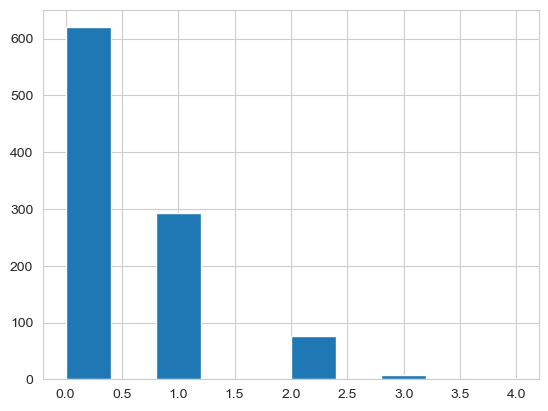

In [13]:
#a
c=2
n=14
no_of_blocks=np.zeros(1000)
for i in range(1000):
	x=np.random.binomial(size=c*2**n,p=0.5,n=2)
	curr_series=1
	for j in range(1,c*2**n):
		if x[j]==x[j-1]:
			curr_series+=1
		else:
			if x[j-1]==1 and curr_series>n:
				no_of_blocks[i]+=1
			curr_series=1
plt.hist(no_of_blocks)
#по т. Севостьянова b_i(c*2^n)=P(x_{i-n}=1,...,x_{i-1}=1,X_{i}=0)=0.5**(n+1), sum b_i(c*2^n)=0.5**(n+1)*c*2**n=c/2 => lambda = 1

2. Пустые ячейки и высоковероятные слова. Многократно симулировать распределение n частиц по n ячейкам, где n = 50, 100, 200, в каждом случае подсчитать число пустых ячеек. Произвести нормировку соответственно ЦПТ о размещении частиц по ячейкам и визуально продемонстрировать сходимость к N (0, 1) распределению.

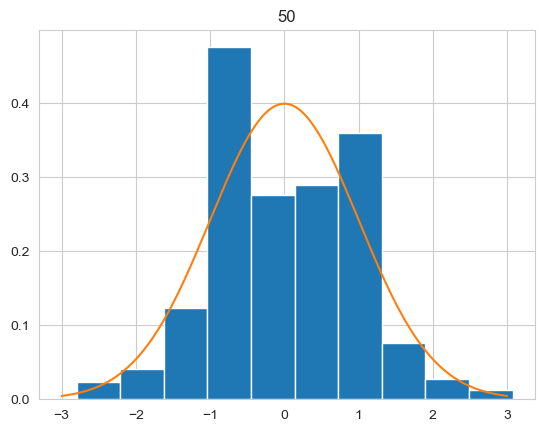

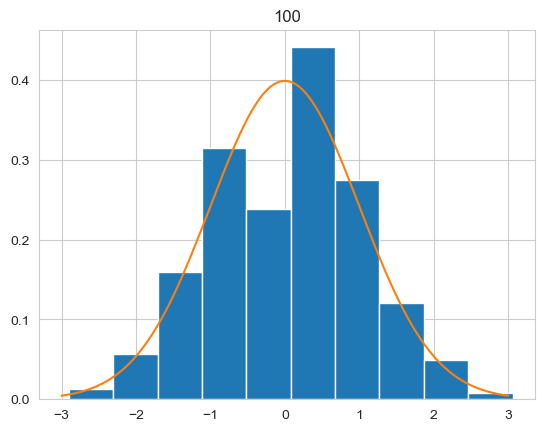

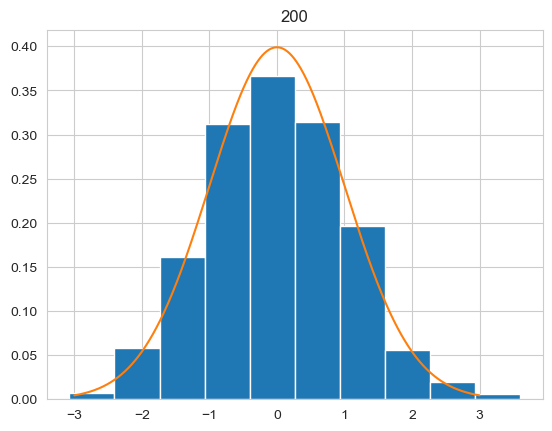

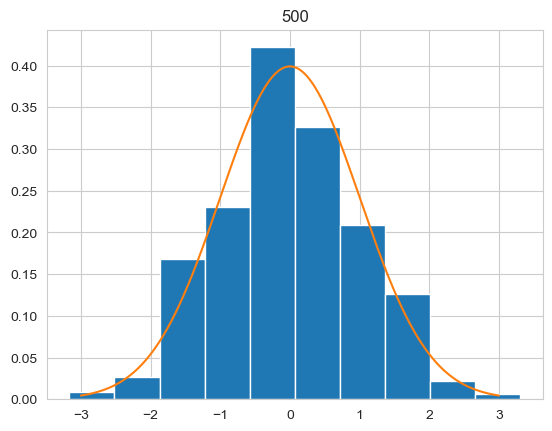

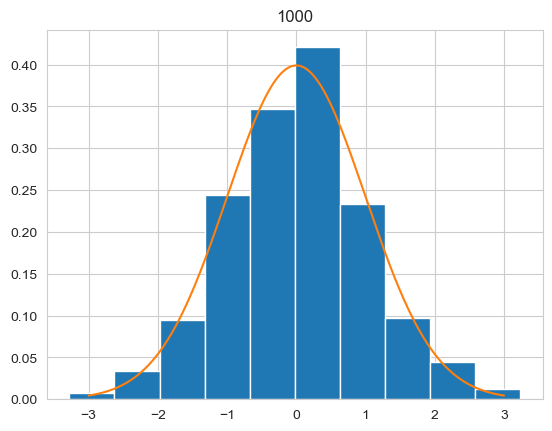

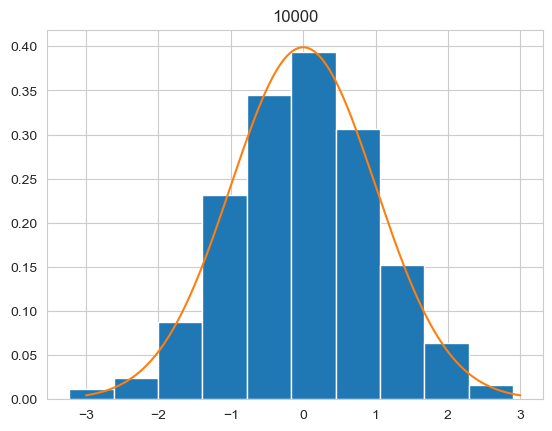

In [59]:
for n in [50,100,200,500,1000,10000]:
	number=np.zeros(1000)
	for i in range(1000):
		x=st.multinomial.rvs(n,np.ones(n)/n)
		for j in range(n):
			if x[j]==0:
				number[i]+=1
	number=(number-np.mean(number))/np.std(number)
	plt.hist(number,density=True)
	x=np.linspace(-3,3,1000)
	plt.plot(x,st.norm.pdf(x))
	plt.title(n)
	plt.show()

4. Теорема Линдеберга.
Моделировать данные Xi ∼ Pi, i ≤ n. Исследовать предельное поведение (Sn − ESn)/√DSn.
а) Pn(n) = Pn(−n) = 1/(2n2), Pn(0) = 1 − 1/n2; б) Pn(n) = Pn(−n) = 1/4, Pn(0) = 1/2.

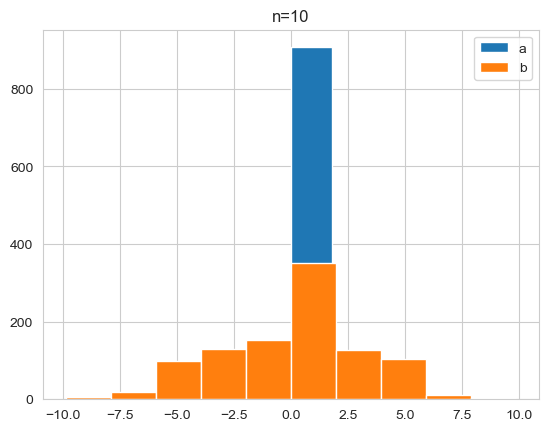

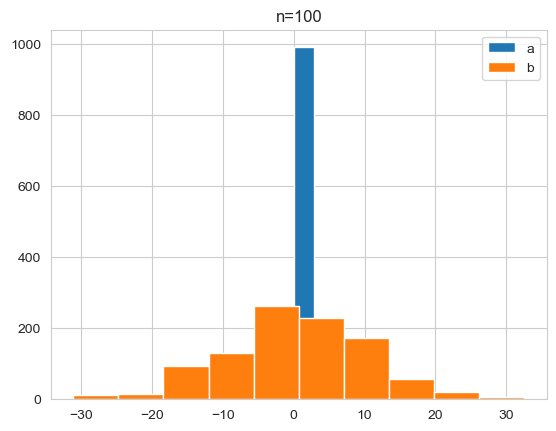

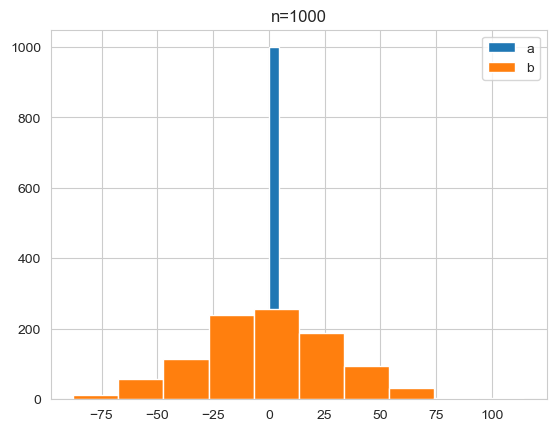

In [53]:
for n in [10,100,1000]:
	stats_a=[]
	stats_b=[]
	for i in range(1000):
		X_a=[]#дисперсия n/2
		for i in range(n):
			x=np.random.uniform(low=0,high=1,size=1)
			if 0<=x<=1/2/n**2:
				X_a.append(-n)
			elif 1/2/n**2<x<=1-1/2/n**2:
				X_a.append(0)
			else:
				X_a.append(n)
		X_b=[]#дисперсия n**2/2
		for i in range(n):
			if np.random.randint(2)==1:
				X_b.append(0)
			else:
				if np.random.randint(2)==1:
					X_b.append(n)
				else:
					X_b.append(-n)
		S_a=np.sum(X_a)
		S_b=np.sum(X_b)
		stats_a.append(S_a/(n/2)**0.5)
		stats_b.append(S_b/(n**2/2)**0.5)
	plt.title('n='+str(n))
	plt.hist(stats_a,label='a')
	plt.hist(stats_b,label='b')
	plt.legend()
	plt.show()

5. Безгранично делимые распределения. Построить предложенные ниже схемы серий и в каждой из них эмпирически определить предельное безграничное делимое распределение: Xn,i ∼ Geom(1 − 1/n).

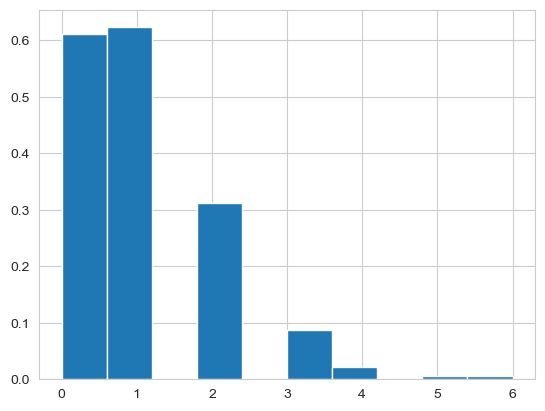

In [61]:
n=10000
Y=[]
for i in range(1000):
	X=st.geom.rvs(size=n,loc=-1,p=(1-1/n))
	Y.append(np.sum(X))
plt.hist(Y,density=True)
None